## Import libraries

In [239]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

## Load the dataset

In [241]:
#load train and test data
train_original_df=pd.read_csv("C:\\Users\\ACER\\Downloads\\train_GzS76OK\\train.csv")
test_original_df=pd.read_csv("C:\\Users\\ACER\\Downloads\\test_QoiMO9B.csv")


In [242]:
#making copy
train_df=train_original_df.copy()
test_df=test_original_df.copy()

## Train data

#### Data Preprocessing

## data understanding

In [250]:
pd.set_option("display.max_columns",None)
train_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [252]:
train_df.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729
456547,1361984,145,61,2490,292.03,290.03,0,0,162


In [254]:
train_df.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')

In [256]:
for col in train_df.columns: 
    print(col,train_df[col].unique())
    print("-"*50)

id [1379560 1466964 1346989 ... 1110849 1147725 1361984]
--------------------------------------------------
week [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145]
--------------------------------------------------
center_id [ 55  24  11  83  32  13 109  52  93 186 146  57 149  89 124 152  97  74
 108  99  66  94  91  20  34 137  92 126  36 162  75 177  27 157 106  64
 129  14  17 153 139 161  81  26  73  50 104  42 113 145  53  72  67 174
  29  77  41  30 

# dimentionality and sanity check

In [260]:
train_df.size

4108932

In [262]:
train_df.shape

(456548, 9)

In [264]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [266]:
train_df.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

In [268]:
train_df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [270]:
# checking duplicates 
train_df.duplicated().sum()

0

In [272]:
#split into categorical and numerical columns
cat_cols=['id', 'center_id', 'meal_id',
       'emailer_for_promotion', 'homepage_featured']
num_cols=[ 'week','checkout_price', 'base_price', 'num_orders']


In [274]:
#checking missing values
train_df.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [275]:
train_df.isna().sum()/train_df.shape[0]*100

id                       0.0
week                     0.0
center_id                0.0
meal_id                  0.0
checkout_price           0.0
base_price               0.0
emailer_for_promotion    0.0
homepage_featured        0.0
num_orders               0.0
dtype: float64

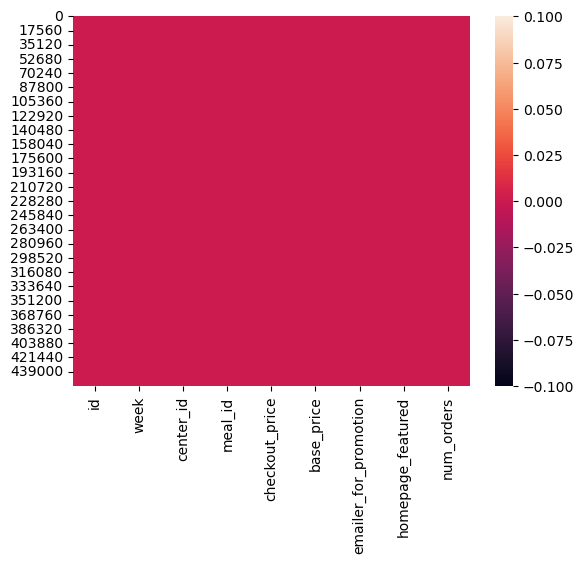

In [276]:
sns.heatmap(train_df.isna())
plt.show()

In [277]:
train_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


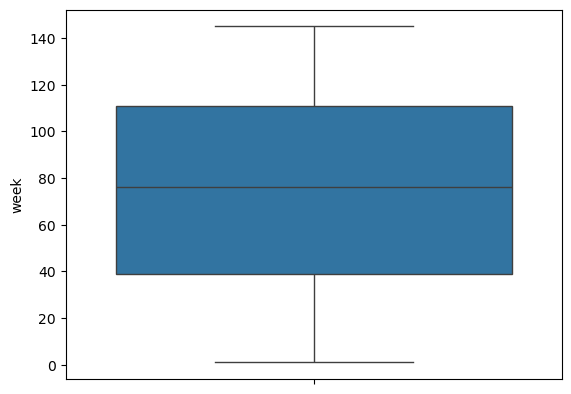

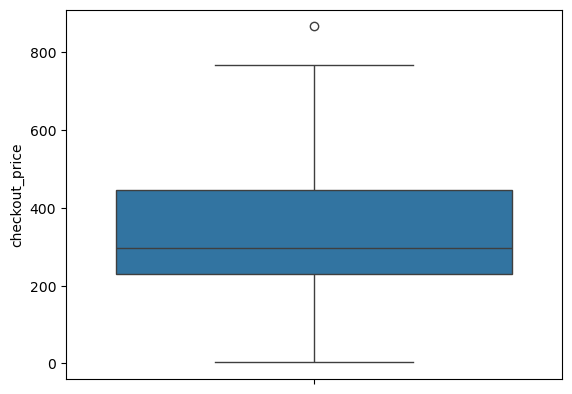

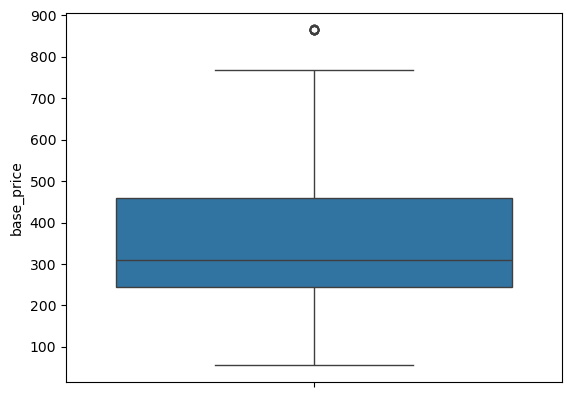

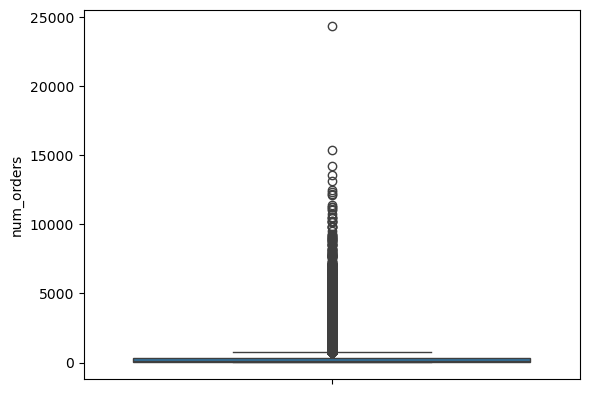

In [278]:
# checking outliers
for col in num_cols: 
    sns.boxplot(df[col]) 
    plt.show() 
    

In [368]:
# outliers handling
def remove_outliers(df,column_name):
    q1=df[column_name].quantile(0.25)
    q3=df[column_name].quantile(0.75)
    iqr=q3-q1
    upper_bound=q3 + 1.5 *iqr
    lower_bound=q1 - 1.5 *iqr
    df[column_name]=df[column_name].clip(upper=upper_bound)# clip function bounds the outliers to upper bound
    df[column_name]=df[column_name].clip(lower=lower_bound)
    return df[column_name]
    

In [369]:
for col in num_cols:
    num_df[col]=remove_outliers(num_df,col)

# EDA

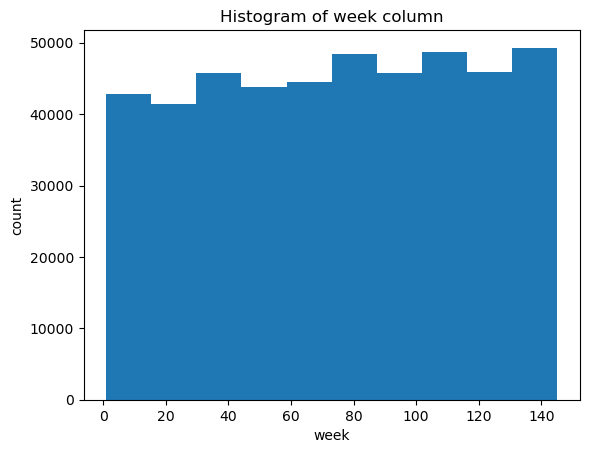

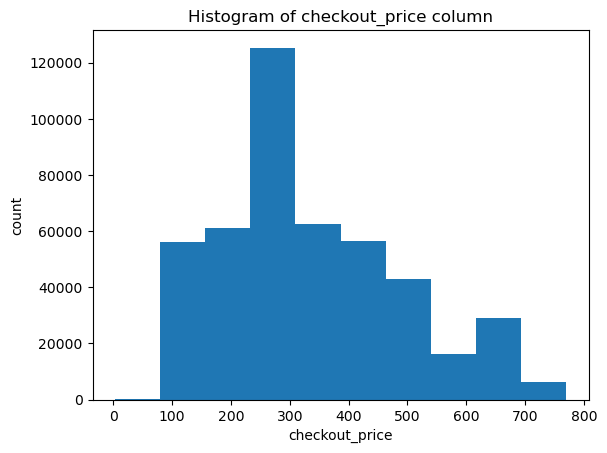

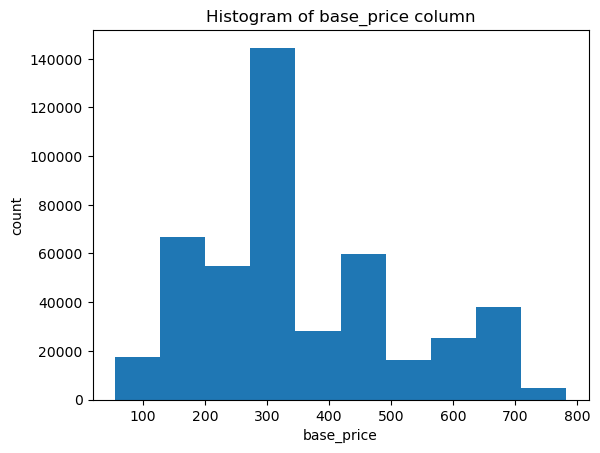

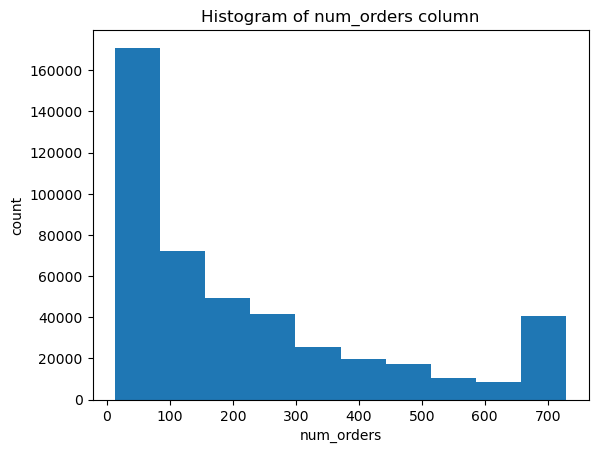

In [283]:
# Univariate analyis
#histogram for numerical values
for col in num_cols:
  plt.hist(num_df[col])
  plt.title("Histogram of {} column".format(col))
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()


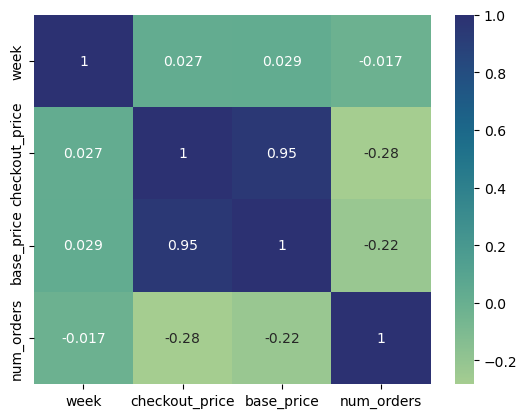

In [285]:
# Correlation Between Numerical Values
sns.heatmap(df[num_cols].corr(),annot=True,cmap='crest')
plt.show()

In [288]:
# scaling
Scaler=StandardScaler()
for col in num_cols:
    train_df[col]=Scaler.fit_transform(train_df[[col]])
    

In [289]:
train_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,-1.776494,55,1885,-1.277687,-1.256048,0,0,-0.214367
1,1466964,-1.776494,55,1993,-1.277687,-1.358465,0,0,0.020527
2,1346989,-1.776494,55,2539,-1.290568,-1.358278,0,0,-0.184058
3,1338232,-1.776494,55,2139,0.047477,0.518763,0,0,-0.525034
4,1448490,-1.776494,55,2631,-0.580222,-0.694746,0,0,-0.560395
...,...,...,...,...,...,...,...,...,...
456543,1271326,1.691304,61,1543,0.992883,0.808467,0,0,-0.489674
456544,1062036,1.691304,61,2304,0.979806,0.796023,0,0,-0.555343
456545,1110849,1.691304,61,2664,-0.618276,-0.205870,0,0,0.603975
456546,1147725,1.691304,61,2569,-0.580222,-0.253968,0,0,1.179846


## Modeling

In [ ]:
y=train_df["num_orders"]
X=train_df[[ 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured']]
test_df.head()

In [402]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

## LINEAR REGRESSION

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error


In [ ]:
reg_lin=LinearRegression()
reg_lin.fit(X_train,y_train)
y_pred=reg_lin.predict(X_test)
y_pred

In [ ]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Sqaured Error:",mse)
print("R Squared:",r2)


In [415]:
model=LinearRegression() #creating an object
model.fit(id,num_orders) # Training the model
predicted_ordes= model.predict(num_orders)

NameError: name 'num_orders' is not defined

### LOGISTIC REGRESSION

In [419]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score,f1_score


In [421]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
print('accuracy:',accuracy_score(y_pred,y_test))
print('precision:',precision_score(y_pred,y_test,average='weighted'))
print('recall:',recall_score(y_pred,y_test,average='weighted'))
print('f1_score:',f1_score(y_pred,y_test,average='weighted'))

### RANDOM FOREST

In [348]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

print("The accuracy score using random forest for the smote model is:",accuracy_score(y_pred_rf,y_test))

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [350]:
(classification_report(y_pred_rf,y_test))

NameError: name 'y_pred_rf' is not defined

# TEST DATA

In [195]:
test_df.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
32568,1250239,155,61,1543,482.09,484.09,0,0
32569,1039516,155,61,2304,483.09,483.09,0,0
32570,1158107,155,61,2664,322.07,323.07,0,0
32571,1444235,155,61,2569,322.07,323.07,0,0
32572,1291286,155,61,2490,276.45,276.45,0,0


In [199]:
test_df.size

260584

In [201]:
test_df.shape

(32573, 8)

In [203]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [207]:
test_df.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
dtype: object

In [219]:
test_df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
count,3.257300e+04,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000
mean,1.248476e+06,150.477819,81.901728,2032.067909,341.854440,356.493615,0.066435,0.081356
std,1.441580e+05,2.864072,45.950455,547.199004,153.893886,155.150101,0.249045,0.273385
min,1.000085e+06,146.000000,10.000000,1062.000000,67.900000,89.240000,0.000000,0.000000
25%,1.123969e+06,148.000000,43.000000,1558.000000,214.430000,243.500000,0.000000,0.000000
50%,1.247296e+06,150.000000,76.000000,1993.000000,320.130000,321.130000,0.000000,0.000000
75%,1.372971e+06,153.000000,110.000000,2569.000000,446.230000,455.930000,0.000000,0.000000
max,1.499996e+06,155.000000,186.000000,2956.000000,1113.620000,1112.620000,1.000000,1.000000


In [221]:
train_df.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')

In [229]:
#split into categorical and numerical columns
cat_cols1=['id', 'center_id', 'meal_id',
       'emailer_for_promotion', 'homepage_featured']
num_cols1=[ 'week','checkout_price', 'base_price', 'num_orders']

In [231]:
test_df.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
dtype: int64

In [ ]:
#checking outliers
for col in num_cols1: 
    sns.boxplot(test_df[col]) 
    plt.show() 
    

# EDA

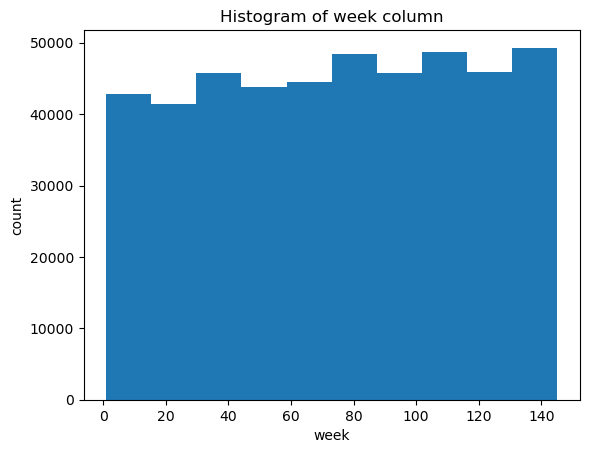

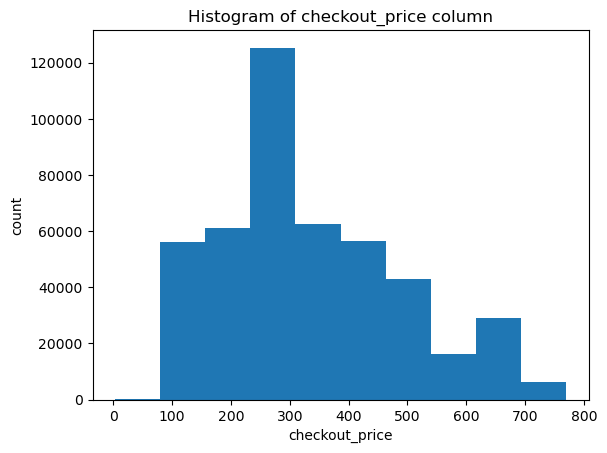

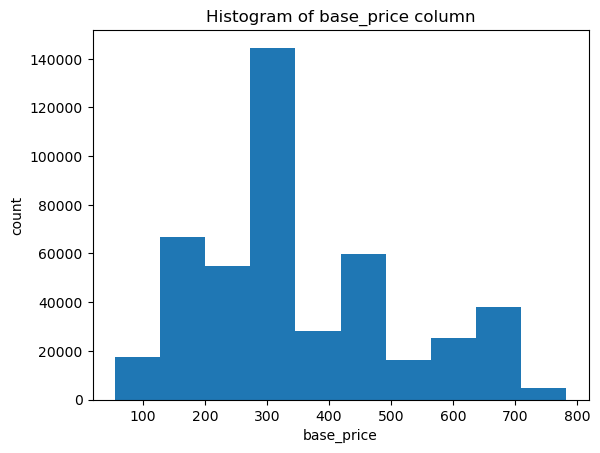

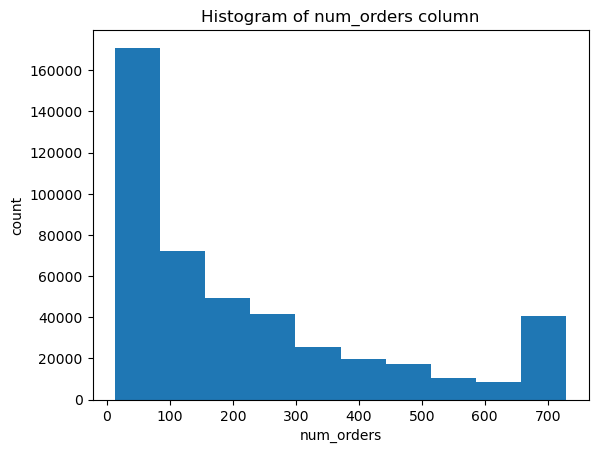

In [235]:
for col in num_cols1:
  plt.hist(num_df[col])
  plt.title("Histogram of {} column".format(col))
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()


In [ ]:
# scaling
Scaler=StandardScaler()
for col in num_cols1:
    test_df[col]=Scaler.fit_transform(test_df[[col]])

### hyper parameter tuning

In [ ]:
model_grid=RandomForestClassifier(n_estimators=200,
                                  max_depth=9,
                                  min_samples_leaf=4)
model_grid.fit(X_train_sm,y_train_sm)
y_pred_grid = model_grid.predict(X_test) 
print(classification_report(y_pred_grid, y_test))

In [ ]:
grid_rf=RandomForestClassifier(n_estimators=100,
                               max_depth=15,
                               min_samples_leaf=1)
grid_rf.fit(X_train_sm,y_train_sm)
y_pred_grid = grid_rf.predict(X_test) 
print(classification_report(y_pred_grid, y_test))

# test the modeling

In [ ]:
X_test=test_df[['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured']

In [ ]:
test_df['num_orders']=model.predict(X_test)

In [ ]:
test_df.head()

In [ ]:

test_df[['id','num_orders']].to_csv('food.csv',index=False)